# Meta-Data (About Dataset)
**Context**
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.


## **
Content**

# 
Column Descriptions:
id (Unique id for each patient)
age (Age of the patient in years)
origin (place of study)
sex (Male/Female)
cp chest pain type
typical angina,
atypical angina,
non-anginal,
asymptomatic
trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
chol (serum cholesterol in mg/dl)
fbs (if fasting blood sugar > 120 mg/dl)
restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
thalach: maximum heart rate achieved
exang: exercise-induced angina (True/ False)
oldpeak: ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
ca: number of major vessels (0-3) colored by fluoroscopy
thal: [normal; fixed defect; reversible defect]
num: the predicted attribute

## Acknowledgements


**Creators:**


Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Relevant Papers:**

Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

**They would be:**


Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aims and Objective:

We will fill this after doing some exploratory Data Analyis (EDA).

## Import Libraries
Let's start the project by impoprting all the libraries that we will need in this project.

In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install scikit-learn
!pip install xgboost


In [8]:
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')


In [9]:
df = pd.read_csv('heart_disease_uci.csv')

In [10]:
# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [12]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [14]:
#data shape 
df.shape

(920, 16)

In [17]:
#id column 
df['id'].min(), df['id'].max()

(np.int64(1), np.int64(920))

In [18]:
# age column
df['age'].min(), df['age'].max()

(np.int64(28), np.int64(77))

In [19]:
# let's summarie the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

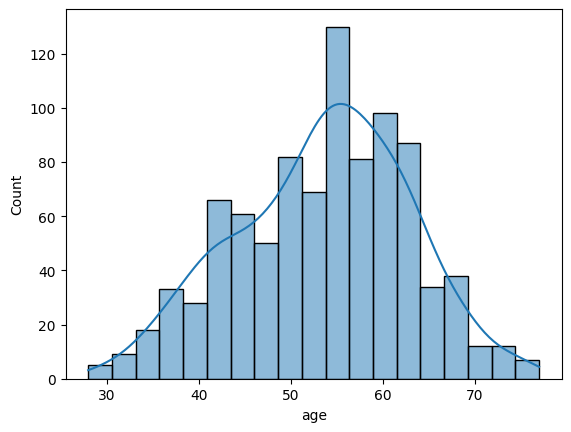

In [20]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


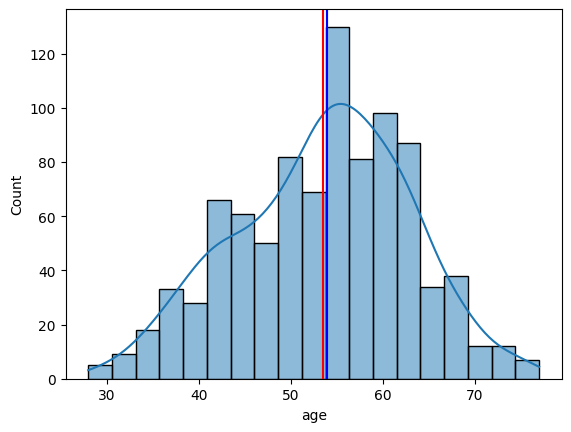

In [21]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axvline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [25]:
pip install nbformat


  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [nbformat]6/7 [nbformat]a-specifications]
Note: you may need to restart the kernel to use updated packages.


In [27]:
import nbformat
print(nbformat.__version__)

5.10.4


In [28]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed